# [Project 4] 금융 거래 고객 신용 위험 예측

---

## 프로젝트 목표
- 금융 거래 데이터 분석을 통하여 고객 신용 위험을 예측하는 분류 모델 수행
- 고객 신용 위험에 영향을 미치는 특성 데이터들에 대한 데이터 분석 수행

---

## 프로젝트 목차
1. **데이터 읽기:** 금융 데이터를 불러오고 Dataframe 구조를 확인
    

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제


3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악<br>
    3.1. Age 시각화<br>
    3.2. Sex 시각화<br>
    3.3. Job 시각화<br>
    3.4. Housing 시각화<br>
    3.5. Saving accounts 시각화<br>
    3.6. Checking account 시각화<br>
    3.7. Credit amount 시각화<br>
    3.8. Duration 시각화<br>
    3.9. Purpose 시각화<br>
    3.10. Risk 시각화<br>
    

4. **데이터 전 처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리<br>
    4.1. Object 자료형 -> 수치 자료형 변환 - Dummy<br>
    4.2. 학습, 테스트 데이터 분리<br>
    

5. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행<br>
    5.1. 기본 분류 모델 학습 - 의사결정나무<br>
    5.2. 다양한 분류 모델 학습<br>
    5.3. 모델 튜닝 및 K-fold 교차 검증<br>


6. **평가 및 예측:** 학습된 모델을 바탕으로 평가 및 예측 수행<br>
    6.1. Confusion Matrix<br>
    6.2. Precision & Recall<br>
    6.3. 테스트 데이터의 예측값 출력<br>



---

## 데이터 출처
-  https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

---

## 프로젝트 개요

금융 거래 데이터는 해당 데이터에 속한 사람들의 소비 패턴을 판단할 수 있고 나아가 생활 패턴까지 유추할 수 있게 합니다. 이러한 정보는 마케터나 금융기관에서 상품을 적절하게 추천할 수 있도록 도움을 줄 수 있습니다. 특히나 고객의 신용 위험 정도는 금융 상품을 추천하거나, 금융 활동을 제한하는데 있어서 중요한 정보로 사용될 수 있을 것입니다.

이번 프로젝트에서는 독일 금융 거래 고객 데이터를 바탕으로 금융 고객의 신용 위험을 예측해보는 분류 모델을 구현합니다. 데이터 분석 및 분류 모델을 바탕으로 새로운 고객의 데이터를 받았을 때, 신용 위험 여부를 예측할 수 있으며, 어떠한 특성 데이터가 위험 여부를 예측하는데 큰 영향을 미쳤는지 또한 알 수 있습니다.

---

## 1. 데이터 읽기

pandas를 사용하여 `german_credit_data.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# german_credit_data.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
df_origin = pd.read_csv("./data/german_credit_data.csv")

In [3]:
# 5개의 데이터 샘플을 출력합니다.
df_origin.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
# dataframe의 정보를 요약해서 출력합니다.
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
df_origin.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## 2. 데이터 정제

데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)**를 처리합니다.

이번 파트에서는 간단한 결측값 처리로 대체 방식을 수행해보겠습니다.

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [6]:
# 결측값 정보를 출력합니다.
df_origin.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

1000개 뿐이 없는 데이터이기에 일반적으로 사용하는 결측값 삭제 방법을 사용하지 않고 결측값을 아래와 같이 대체하여 보겠습니다.

In [7]:
# 정제 작업이 수행될 dataframe 을 df_claen으로 정의합니다. 
df_clean = df_origin

# 'Saving accounts' ,'Checking account' 변수에 있는 결측값을 `Others`로 대체합니다.
df_clean['Saving accounts'] = df_origin['Saving accounts'].fillna('Others')
df_clean['Checking account'] = df_origin['Checking account'].fillna('Others')

In [8]:
# 결측값 정보를 출력합니다.
df_clean.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

## 3. 데이터 시각화

각 변수 분포를 알아보기 위하여 시각화를 수행하겠습니다.

### 3.1. `Age` 시각화

seaborn을 사용하면 아래와 같이 시각화 할 수 있습니다.

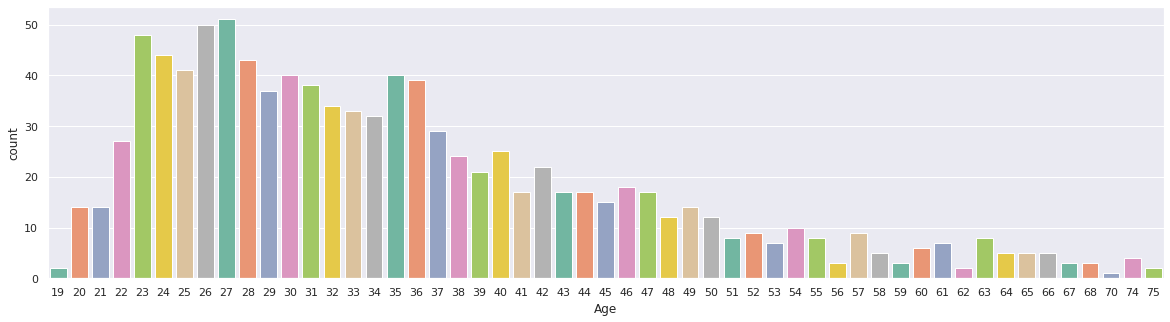

In [9]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(20,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style='darkgrid')
ax = sns.countplot(x='Age', data=df_clean, palette="Set2")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

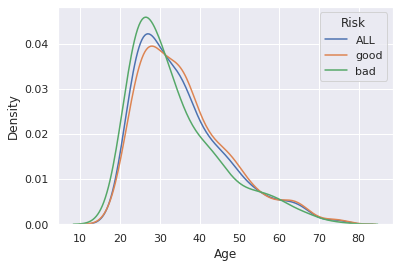

In [10]:
sns.distplot(df_clean['Age'], hist=False, label='ALL')
sns.distplot(df_clean[df_clean['Risk']=='good']['Age'], hist=False, label='good')
sns.distplot(df_clean[df_clean['Risk']=='bad']['Age'], hist=False, label='bad')

plt.legend(title='Risk')
plt.show()

### 3.2. `Sex` 시각화

male      690
female    310
Name: Sex, dtype: int64

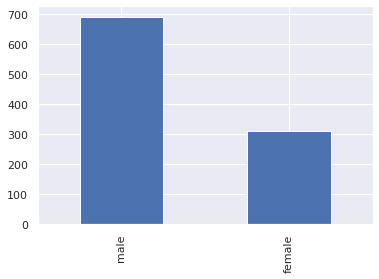

In [11]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Sex'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Sex'].value_counts()

In [12]:
def multiplot(columns):
    df_multi = pd.DataFrame({'ALL': df_clean[columns].value_counts().sort_index().values,
                          'good': df_clean[df_clean['Risk']=='good'][columns].value_counts().sort_index().values,
                          'bad': df_clean[df_clean['Risk']=='bad'][columns].value_counts().sort_index().values
                          }, index=df_clean[columns].value_counts().sort_index().index)

    df_multi.plot(kind='bar')
    plt.legend(title='Risk')
    plt.show()

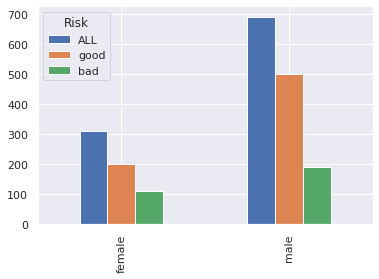

In [13]:
multiplot('Sex')

### 3.3. `Job` 시각화

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

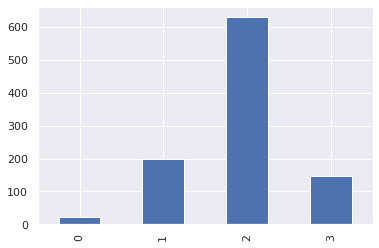

In [14]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Job'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Job'].value_counts()

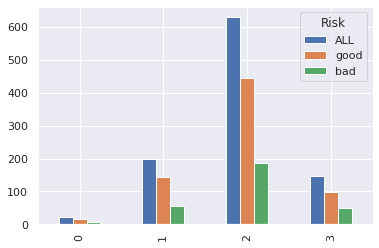

In [15]:
multiplot('Job')

### 3.4. `Housing ` 시각화

own     713
rent    179
free    108
Name: Housing, dtype: int64

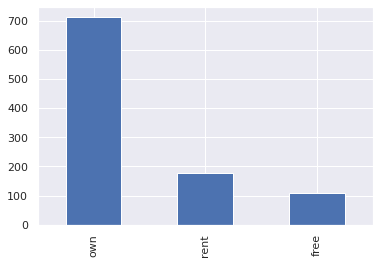

In [16]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Housing'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Housing'].value_counts()

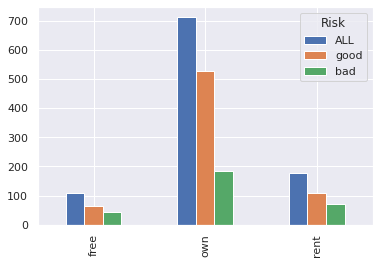

In [17]:
multiplot('Housing')

### 3.5. `Saving accounts ` 시각화

little        603
Others        183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

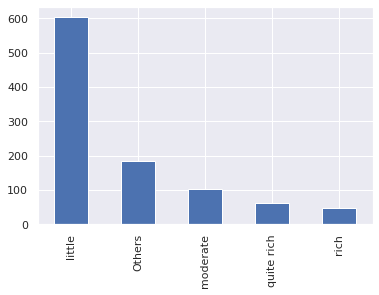

In [18]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Saving accounts'].value_counts().plot(kind='bar')

# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Saving accounts'].value_counts()

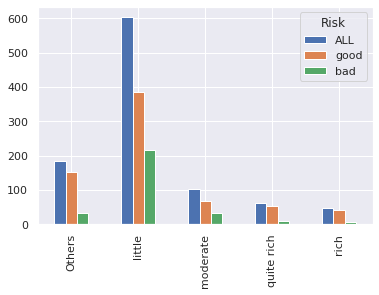

In [19]:
multiplot('Saving accounts')

### 3.6. `Checking account ` 시각화

Others      394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

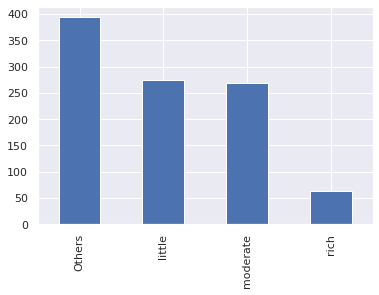

In [20]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Checking account'].value_counts().plot(kind='bar')

# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Checking account'].value_counts()

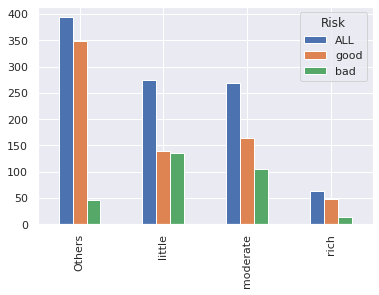

In [21]:
multiplot('Checking account')

**퀴즈1. `df_clean` 데이터에서 `Risk`가 `bad`이고, `Checking account`와 `Saving accounts`가 모두 `little`인 샘플 수를 구하세요.**

In [22]:
# DataFrame에서 복수의 조건을 사용 시, DataFrame(A & B & C)을 활용해봅시다.

df_clean[(df_clean['Risk']=='bad') & (df_clean['Checking account']=='little') & (df_clean['Saving accounts']=='little')]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
4,4,53,male,2,free,little,little,4870,24,car,bad
11,11,24,female,2,rent,little,little,4308,48,business,bad
13,13,60,male,1,own,little,little,1199,24,car,bad
29,29,63,male,2,own,little,little,6836,60,business,bad
44,44,58,female,1,free,little,little,6143,48,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
958,958,45,male,1,own,little,little,4006,28,car,bad
972,972,29,female,0,rent,little,little,1193,24,car,bad
973,973,36,male,2,rent,little,little,7297,60,business,bad
983,983,26,male,2,own,little,little,8229,36,car,bad


In [23]:
len(df_clean[(df_clean['Risk']=='bad') & (df_clean['Checking account']=='little') & (df_clean['Saving accounts']=='little')])

114

In [24]:
# int형으로 결과값을 저장합니다. 
quiz_1 = len(df_clean[(df_clean['Risk']=='bad') & (df_clean['Checking account']=='little') & (df_clean['Saving accounts']=='little')])

### 3.7. `Credit amount ` 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x7f970a7e4dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f970a7e4cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f970a7e4370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f970a80ea60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f970a80ea30>],
 'means': []}

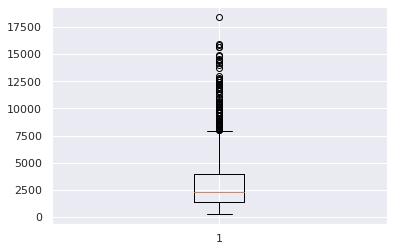

In [25]:
# 수치형 데이터는 boxplot으로 분포를 출력합니다.
plt.boxplot(df_clean['Credit amount'])

<AxesSubplot:xlabel='Risk', ylabel='Credit amount'>

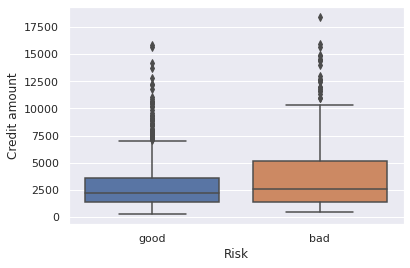

In [26]:
sns.boxplot(x='Risk', y='Credit amount', data=df_clean)

### 3.8. `Duration ` 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x7f970a4ae040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f970a4ae700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f970a49e730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f970a4aedc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9708b2a670>],
 'means': []}

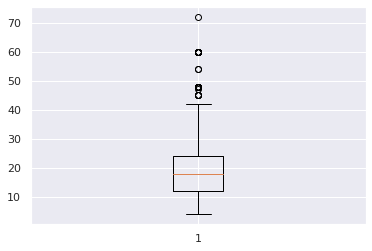

In [27]:
# 수치형 데이터는 boxplot으로 분포를 출력합니다.
plt.boxplot(df_clean['Duration'])

<AxesSubplot:xlabel='Risk', ylabel='Duration'>

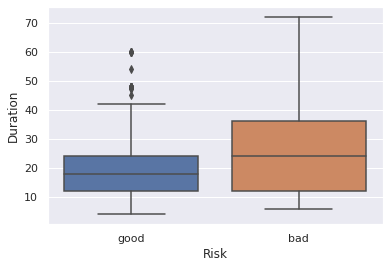

In [28]:
sns.boxplot(x='Risk', y='Duration', data=df_clean)

### 3.9. `Purpose` 시각화

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

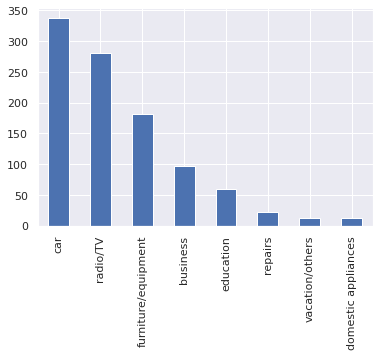

In [29]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Purpose'].value_counts().plot(kind='bar')

# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Purpose'].value_counts()

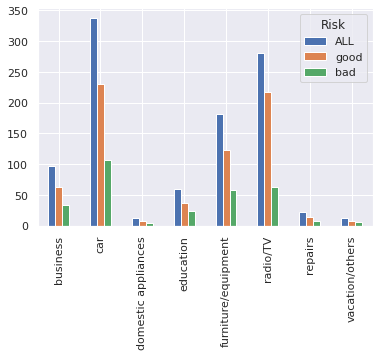

In [30]:
multiplot('Purpose')

### 3.10. `Risk` 시각화

good    700
bad     300
Name: Risk, dtype: int64

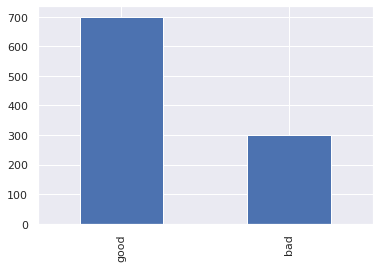

In [31]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Risk'].value_counts().plot(kind='bar')

# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Risk'].value_counts()

## 4. 데이터 전 처리

신용 예측을 수행하기 위해서 주어진 금융 거래 데이터에 대해서 분류 모델을 사용할 것입니다.

분류 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전처리를 수행하겠습니다.

1. Object 자료형 -> 숫자 자료형 변환하기
2. 학습 데이터와 테스트 데이터로 나누기

### 4.1. Object 자료형 -> 수치 자료형 변환 - Dummy

일반적인 머신러닝 모델에서는 수치 자료형만을 입력값으로 사용합니다. 따라서 수치 자료형만을 사용하여 입력값으로 사용할 수 있지만, 신용 예측을 위한 데이터에 존재하는 `Housing`, `Sex`. `Job`과 같은 중요한 정보일 수 잇는 object 자료형을 사용할 수가 없습니다.

그렇기에 이러한 object 자료형을 수치 자료형으로 변환하는 dummy 방식을 사용하여 다양한 데이터를 수치형 입력으로 사용해 봅시다.

In [32]:
# 2개의 카테고리를 갖는 데이터는 replace를 사용하여 0,1로 변환 합니다.
df_clean = df_clean.replace(['good','bad'],[0,1])

# object 자료형 데이터의 변수를 정리합니다.
cat_features = ['Sex','Housing', 'Saving accounts', 'Checking account','Purpose']
# 수치 자료형 데이터의 변수를 정리합니다.
num_features=['Age', 'Job', 'Credit amount', 'Duration','Risk']

# 더미를 기법을 사용하여 변환합니다.
for variable in cat_features:
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
    dummies = pd.get_dummies(df_clean[cat_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
    df1= pd.concat([df_clean[num_features], dummies],axis=1)

In [33]:
df1

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# 예측해야 할 변수인 `Risk`를 제거하여 머신러닝 입력값인 x에 저장합니다.
x = df1.drop(columns = ['Risk']).to_numpy()

In [35]:
# 예측해야 할 변수 `Risk`만을 선택하여 numpy 형태로 y에 저장합니다.
y = df_clean['Risk']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용

In [36]:
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### 4.2. 학습, 테스트 데이터 분리

머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용합니다.

In [37]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손 쉽게 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [38]:
x_train

array([[  30,    2, 2862, ...,    0,    0,    0],
       [  27,    2, 3123, ...,    0,    0,    0],
       [  24,    3, 7408, ...,    0,    0,    0],
       ...,
       [  64,    1, 3832, ...,    0,    0,    0],
       [  31,    1, 1928, ...,    0,    0,    0],
       [  31,    1, 9857, ...,    0,    0,    0]])

## 5. 머신러닝 모델 학습

전 처리된 데이터를 바탕으로 분류 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 분류 모델인 **의사결정나무**를 사용하여 학습을 수행하고, 다양한 모델들을 살펴봅시다.

### 5.1. 기본 분류 모델 학습 - 의사결정나무

In [39]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
# max_iter는 로지스틱 알고리즘의 반복 횟수를 조정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정함
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.66


### 5.2. 다양한 분류 모델 학습

로지스틱 분류기 모델 이외의 다양한 분류 알고리즘을 사용하고 그 성능을 비교하여 봅시다.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('LR', LogisticRegression(max_iter =5000))) # 로지스틱 분류기 
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LR - train_score : 0.737500, test score : 0.735000
LDA - train_score : 0.742500, test score : 0.720000
KNN - train_score : 0.757500, test score : 0.650000
NB - train_score : 0.715000, test score : 0.715000
RF - train_score : 1.000000, test score : 0.755000
SVM - train_score : 0.992500, test score : 0.710000
XGB - train_score : 1.000000, test score : 0.770000


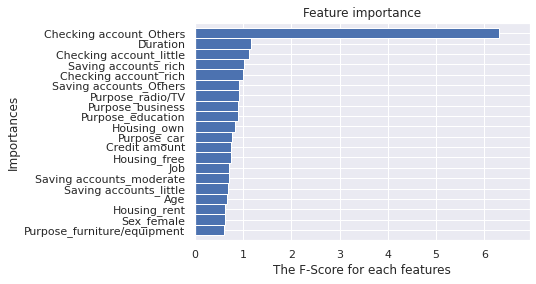

In [41]:
# xgb 모델에서 변수 중요도를 출력합니다.
max_num_features = 20
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)

ytick = ax.get_yticklabels()
feature_importance = []
for i in range(max_num_features):
    feature_importance.append(df1.drop(columns=['Risk']).columns[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(feature_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

### 5.3. 모델 튜닝 및 K-fold 교차 검증

머신러닝 모델들은 데이터의 특성에 잘 맞도록 다양한 파라미터를 조절하여 성능을 높일 수 있습니다. 이러한 과정을 모델 튜닝이라 하며 본 과정에서는 GridSearchCV를 사용하여 구현해보겠습니다. 추가로 k-fold 방식 또한 사용하여 학습 과정에서 생길 수 있는 과적합을 예방해 봅시다.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [3, 4, 5, 6],
              'max_features': ['auto', 'sqrt', 'log2']}

# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)
# 의사결정트리 모델을 튜닝하기 위하여 선언합니다.
DT = DecisionTreeClassifier()

# 모델 튜닝을 우해서 GridSearchCV를 사용합니다.
DT_CV = GridSearchCV(DT, parameters, scoring = 'accuracy', cv = cv, n_jobs= -1)
# 학습을 수행합니다.
DT_CV.fit(x_train, y_train)

# 결과를 출력합니다.
print(DT_CV.score(x_train, y_train))
print(DT_CV.score(x_test, y_test))

0.74875
0.715


In [43]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
DT_CV.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}

In [44]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_DT_CV = DT_CV.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_DT_CV.score(x_test, y_test)

0.715

## 6. 평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 신용 위험 예측에서는 recall 값 또한 살펴봐야 합니다.

신용 위험 예측에서 중요한 것은 위험 없음을 정확히 예측하는 것 보단 위험 있음을 정확히 예측하는 것입니다. 

recall 방식은 `예측한 위험 있음` 대비 `실제 위험 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

### 6.1. Confusion Matrix

기존 score에서 볼 수 있었던 결과는 accuracy 기반의 결과였습니다. confusion matrix를 출력하여 각 class 별로 예측한 결과에 대해서 자세히 알아봅시다.

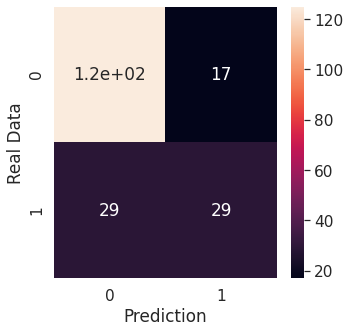

array([[125,  17],
       [ 29,  29]])

In [45]:
from sklearn.metrics import confusion_matrix

# xgb 모델의 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장합니다.
model_predition = models[-1][1].predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm = confusion_matrix(y_test, model_predition)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
cm

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `위험 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `위험 없음(Pass)`인 경우의 개수
- **0,1 의 값:** `위험 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `위험 없음(Pass)`인 경우의 개수
- **1,0 의 값:** `위험 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `위험 있음(Fail)`인 경우의 개수
- **1,1 의 값:** `위험 있음(Fail)` 이라고 에측했을 때, 실제 데이터가 `위험 있음(Fail)`인 경우의 개수

**퀴즈2. `best_DT_CV` 모델에서 평가용 데이터(`x_test, y_test`)의 confusion matrix를 구하세요.**

In [46]:
# best_DT_CV의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 구할 수 있습니다.


# -- 위 소스 코드 일부 수정 -- #

# xgb 모델의 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장합니다.
model_predition_DT = best_DT_CV.predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_DT = confusion_matrix(y_test, model_predition_DT)

In [47]:
# confusion_matrix() 결과값을 저장합니다. 
quiz_2 = cm_DT

### 6.2. Precision & Recall

분류 모델의 또 다른 성능 지표로 Precsion과 Recall를 구하여 봅시다.

In [48]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력합니다.
print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.5
Precision score: 0.6304347826086957


### 6.3. 테스트 데이터의 예측값 출력

테스트 데이터를 하나씩 입력하여 그 결과를 출력해 봅시다.

In [49]:
# 0번부터 9번까지 10개를 출력해보겠습니다.
for i in range(10): 
    
    # XGB 모델을 사용하였습니다.
    prediction = models[-1][1].predict(x_test[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
1 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
2 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
3 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
4 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
5 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
6 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
7 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
8 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
9 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1


---

## 제출하기

퀴즈 1번, 2번까지 수행 후, 아래 코드를 실행하면 `quize_1, quize_2` 변수가 저장된 `submission.pickle` 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [50]:
import pickle

d = {'quiz_1': quiz_1, 'quiz_2': quiz_2}

with open('submission.pickle', 'wb') as f:
    pickle.dump(d, f)

In [51]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [52]:
# 제출 파일 업로드
await upload()

이메일 > deomi@knou.ac.kr
비밀번호 > ········
이전에 업로드 된 파일 삭제중...
업로드가 완료되었습니다.


In [53]:
# 채점 수행
await check_score()

Quiz 1: Pass

Quiz 2: Pass

점수는 100 점 입니다.


---

## 챌린지

이번 프로젝트에서 사용한 모델은 학습용 데이터에 대한 **accuracy**는 좋은 성능을 보여주었지만, 평가용 데이터에서 **precision, recall** 지표는 좋은 성능을 보여주지 못 하였습니다. 다양한 방식을 사용하여 평가용 데이터에서의 **precision, recall**을 높일 수 있는 방법을 찾아봅시다.

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>